In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import mplfinance as mpf
import os
import random

notebook_dir = Path().resolve()
project_root = notebook_dir.parent
sys.path.insert(0, str(project_root / 'src'))

import config

# Train labels

In [20]:
x_path = os.path.join('..', config.TRAIN_DATA_DIR, config.X_TRAIN_NAME)
l_path = os.path.join('..', config.TRAIN_DATA_DIR, config.L_TRAIN_NAME)
y_path = os.path.join('..', config.TRAIN_DATA_DIR, config.Y_TRAIN_NAME)

X_train = np.load(x_path)
L_train = np.load(l_path)
Y_train = np.load(y_path)

C:\Users\user\AppData\Local\Temp\ipykernel_13168\4233229017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_labels, x='label_name', order=counts.index, palette='viridis')


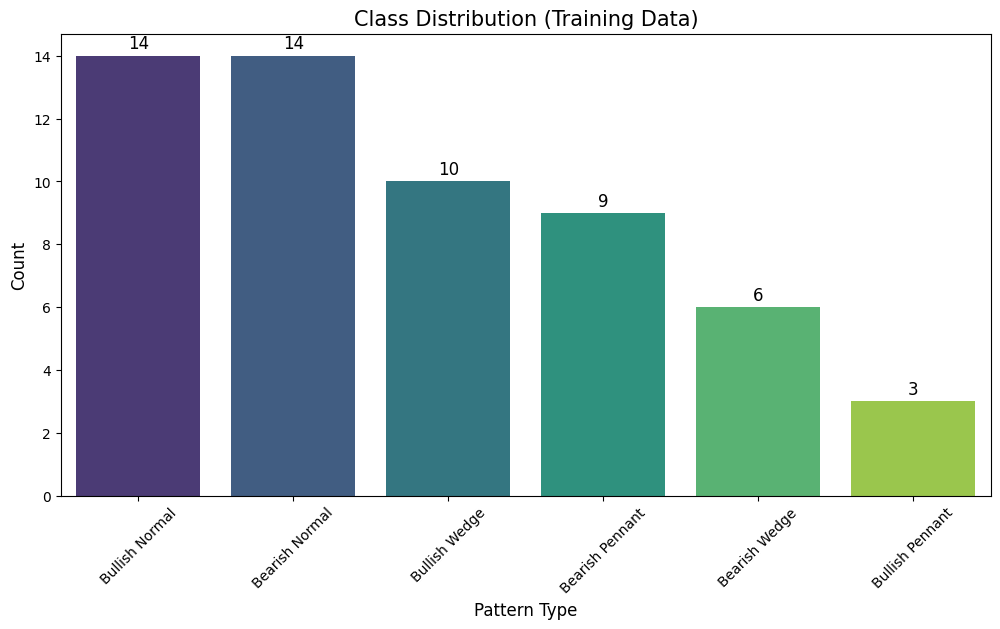

Exact distribution:
label_name
Bullish Normal     14
Bearish Normal     14
Bullish Wedge      10
Bearish Pennant     9
Bearish Wedge       6
Bullish Pennant     3
Name: count, dtype: int64


In [21]:
ID_TO_LABEL = {v: k for k, v in config.LABEL_MAP.items()}

df_labels = pd.DataFrame({'label_id': Y_train})
df_labels['label_name'] = df_labels['label_id'].map(ID_TO_LABEL)

counts = df_labels['label_name'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_labels, x='label_name', order=counts.index, palette='viridis')

plt.title('Class Distribution (Training Data)', fontsize=15)
plt.xlabel('Pattern Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

print("Exact distribution:")
print(counts)

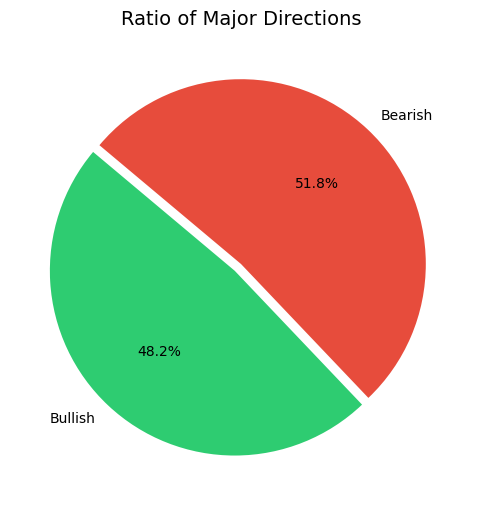

Bullish samples: 27
Bearish samples: 29


In [23]:
bullish_count = np.sum(Y_train <= 2)
bearish_count = np.sum(Y_train >= 3)

labels = ['Bullish', 'Bearish']
sizes = [bullish_count, bearish_count]
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Ratio of Major Directions', fontsize=14)
plt.show()

print(f"Bullish samples: {bullish_count}")
print(f"Bearish samples: {bearish_count}")

C:\Users\user\AppData\Local\Temp\ipykernel_13168\2323114943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labels, x='label_name', y='length', order=sorted_order, palette="Set3")


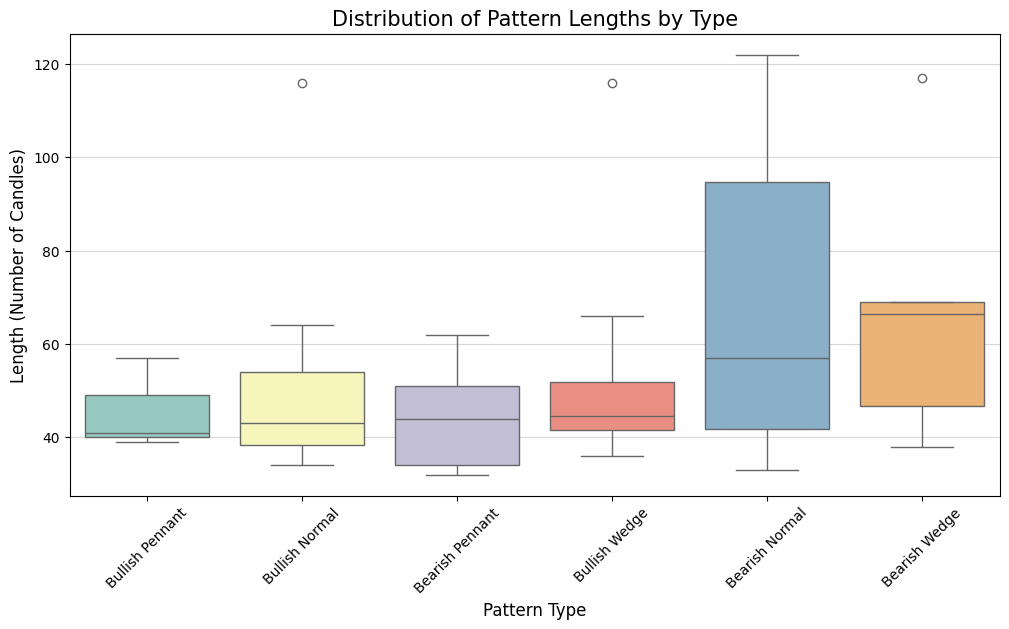

Average length by type:
label_name
Bearish Pennant    44.111111
Bullish Pennant    45.666667
Bullish Normal     50.571429
Bullish Wedge      52.900000
Bearish Wedge      66.333333
Bearish Normal     67.428571
Name: length, dtype: float64


In [24]:
df_labels['length'] = L_train

plt.figure(figsize=(12, 6))

sorted_order = df_labels.groupby('label_name')['length'].median().sort_values().index

sns.boxplot(data=df_labels, x='label_name', y='length', order=sorted_order, palette="Set3")

plt.title('Distribution of Pattern Lengths by Type', fontsize=15)
plt.xlabel('Pattern Type', fontsize=12)
plt.ylabel('Length (Number of Candles)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

print("Average length by type:")
print(df_labels.groupby('label_name')['length'].mean().sort_values())

# Test labels

In [25]:
x_test_path = os.path.join('..', config.TEST_DATA_DIR, config.X_TEST_NAME)
l_test_path = os.path.join('..', config.TEST_DATA_DIR, config.L_TEST_NAME)
y_test_path = os.path.join('..', config.TEST_DATA_DIR, config.Y_TEST_NAME)

X_test = np.load(x_test_path)
L_test = np.load(l_test_path)
Y_test = np.load(y_test_path)

C:\Users\user\AppData\Local\Temp\ipykernel_13168\3626180495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_labels, x='label_name', order=counts.index, palette='viridis')


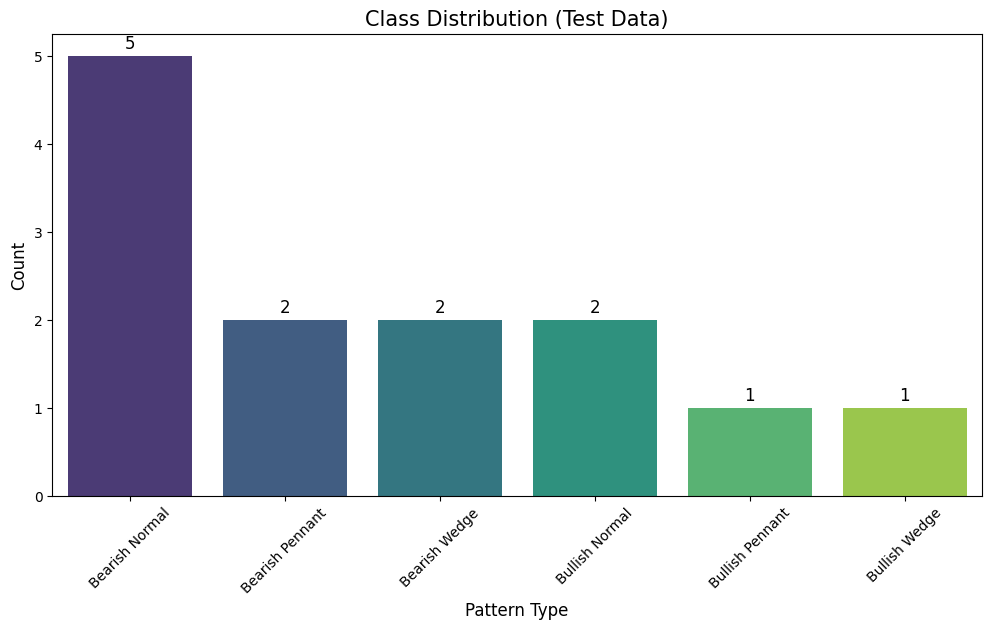

Exact distribution:
label_name
Bearish Normal     5
Bearish Pennant    2
Bearish Wedge      2
Bullish Normal     2
Bullish Pennant    1
Bullish Wedge      1
Name: count, dtype: int64


In [27]:
ID_TO_LABEL = {v: k for k, v in config.LABEL_MAP.items()}

df_labels = pd.DataFrame({'label_id': Y_test})
df_labels['label_name'] = df_labels['label_id'].map(ID_TO_LABEL)

counts = df_labels['label_name'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_labels, x='label_name', order=counts.index, palette='viridis')

plt.title('Class Distribution (Test Data)', fontsize=15)
plt.xlabel('Pattern Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

print("Exact distribution:")
print(counts)

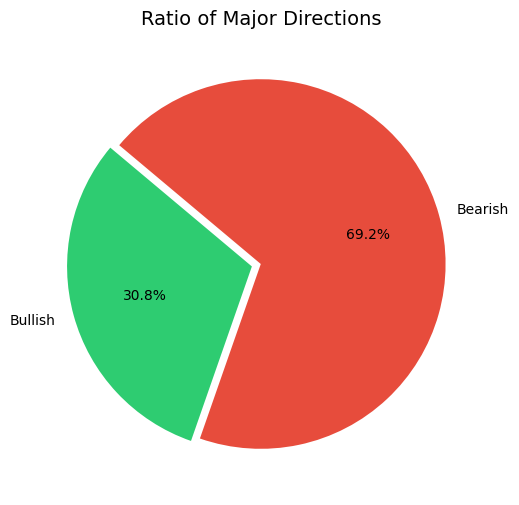

Bullish samples: 4
Bearish samples: 9


In [28]:
bullish_count = np.sum(Y_test <= 2)
bearish_count = np.sum(Y_test >= 3)

labels = ['Bullish', 'Bearish']
sizes = [bullish_count, bearish_count]
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Ratio of Major Directions', fontsize=14)
plt.show()

print(f"Bullish samples: {bullish_count}")
print(f"Bearish samples: {bearish_count}")

C:\Users\user\AppData\Local\Temp\ipykernel_13168\2707265556.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labels, x='label_name', y='length', order=sorted_order, palette="Set3")


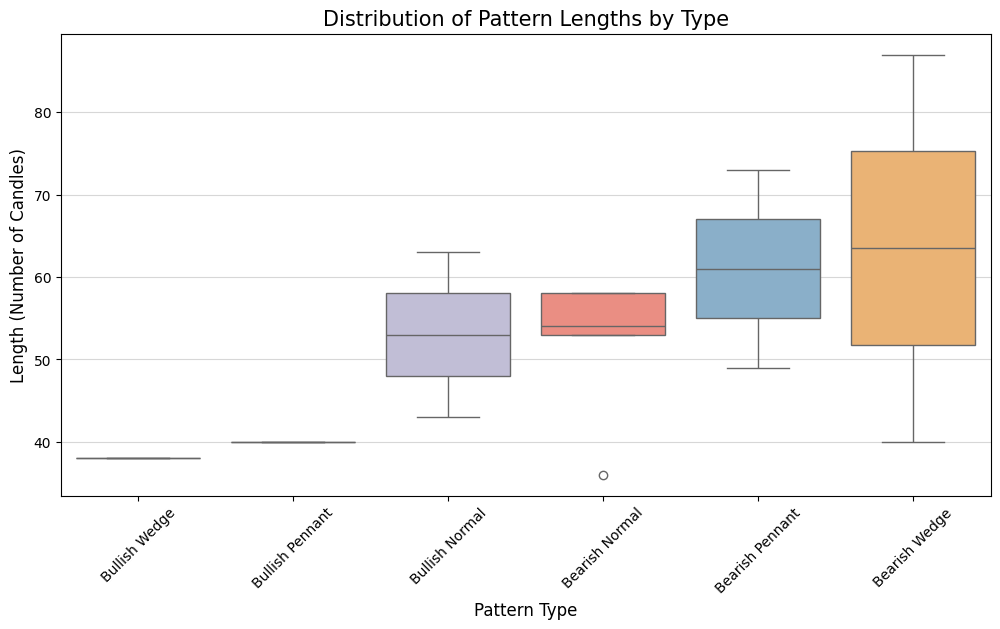

Average length by type:
label_name
Bullish Wedge      38.0
Bullish Pennant    40.0
Bearish Normal     51.8
Bullish Normal     53.0
Bearish Pennant    61.0
Bearish Wedge      63.5
Name: length, dtype: float64


In [29]:
df_labels['length'] = L_test

plt.figure(figsize=(12, 6))

sorted_order = df_labels.groupby('label_name')['length'].median().sort_values().index

sns.boxplot(data=df_labels, x='label_name', y='length', order=sorted_order, palette="Set3")

plt.title('Distribution of Pattern Lengths by Type', fontsize=15)
plt.xlabel('Pattern Type', fontsize=12)
plt.ylabel('Length (Number of Candles)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

print("Average length by type:")
print(df_labels.groupby('label_name')['length'].mean().sort_values())

# Conclusion

The majority of samples consist of normal flag patterns in both datasets. In the training data, the classes are relatively balanced. However, in the test set, due to limited data availability, there is a noticeable imbalance between bullish and bearish flag ratios.